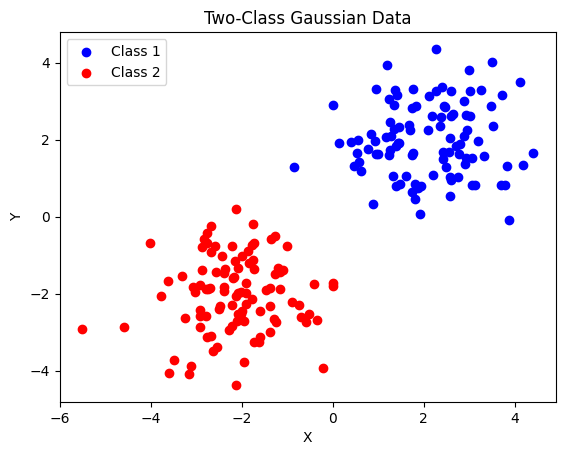

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Set the parameters for class 1
mean1 = [2, 2]
cov1 = [[1, 0], [0, 1]]

# Set the parameters for class 2
mean2 = [-2, -2]
cov2 = [[1, 0], [0, 1]]

# Generate samples for class 1
samples_class1 = np.random.multivariate_normal(mean1, cov1, 100)

# Generate samples for class 2
samples_class2 = np.random.multivariate_normal(mean2, cov2, 100)

# Plot the data
plt.scatter(samples_class1[:, 0], samples_class1[:, 1], c='blue', label='Class 1')
plt.scatter(samples_class2[:, 0], samples_class2[:, 1], c='red', label='Class 2')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Two-Class Gaussian Data')

# Add a legend
plt.legend()

# Show the plot
plt.show()


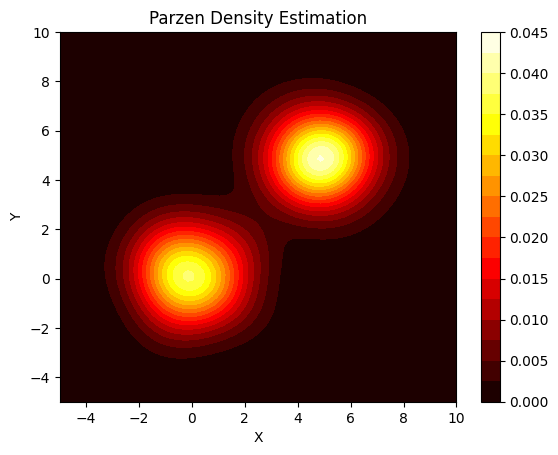

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def parzen_density_estimate(samples, query_point, h):
    """Compute the Parzen density estimate at a query point."""
    kernel = multivariate_normal(mean=query_point, cov=h)
    return np.mean(kernel.pdf(samples))

def parzen_density_estimation(samples, query_points, h):
    """Compute the Parzen density estimates at multiple query points."""
    estimates = []
    for point in query_points:
        estimate = parzen_density_estimate(samples, point, h)
        estimates.append(estimate)
    return np.array(estimates)

# Generate random data
np.random.seed(0)
data = np.concatenate([np.random.normal(loc=0, scale=1, size=(100, 2)),
                       np.random.normal(loc=5, scale=1, size=(100, 2))])

# Set the query points
x = np.linspace(-5, 10, 100)
y = np.linspace(-5, 10, 100)
X, Y = np.meshgrid(x, y)
query_points = np.vstack([X.ravel(), Y.ravel()]).T

# Set the bandwidth (window size)
h = np.eye(2)  # Bandwidth matrix (covariance matrix)

# Compute the Parzen density estimates
density_estimates = parzen_density_estimation(data, query_points, h)

# Reshape the density estimates for plotting
density_estimates = density_estimates.reshape(X.shape)

# Plot the density estimates
plt.contourf(X, Y, density_estimates, levels=20, cmap='hot')
plt.colorbar()

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Parzen Density Estimation')

# Show the plot
plt.show()


In [5]:
from itertools import starmap

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import mlab
sns.set(color_codes=True)
# inline plots in jupyter notebook
%matplotlib inline


# generate synthetic data from a mixture of two Gaussians with equal weights
# the solution below readily generalises to more components 
nsamples = 10000
means = [6, 12]
sds = [1, 1]
weights = [0.5, 0.5]
draws = np.random.multinomial(nsamples, weights)
samples = np.concatenate(list(starmap(np.random.normal, zip(means, sds, draws))))

means2 = [3, 9]
sds2 = [1, 1]
weights2 = [0.5, 0.5]
draws2 = np.random.multinomial(nsamples, weights2)
samples2 = np.concatenate(list(starmap(np.random.normal, zip(means2, sds2, draws2))))

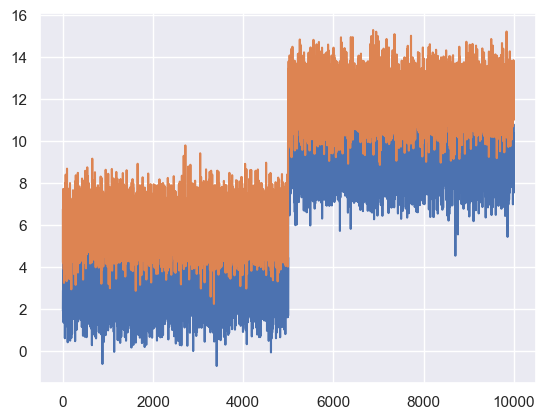

In [16]:
plt.plot(samples2)
plt.plot(samples)
plt.show()

(array([  1.,   1.,   5.,   9.,  14.,  32.,  64., 106., 191., 228., 323.,
        380., 474., 510., 540., 484., 436., 375., 286., 195., 149.,  87.,
         51.,  25.,  18.,  10.,  12.,  25.,  40.,  50., 114., 163., 231.,
        317., 390., 466., 536., 535., 514., 434., 383., 245., 212., 137.,
         89.,  51.,  31.,  17.,  10.,   4.]),
 array([ 2.25989936,  2.52055526,  2.78121116,  3.04186706,  3.30252296,
         3.56317886,  3.82383476,  4.08449066,  4.34514656,  4.60580245,
         4.86645835,  5.12711425,  5.38777015,  5.64842605,  5.90908195,
         6.16973785,  6.43039375,  6.69104965,  6.95170555,  7.21236145,
         7.47301735,  7.73367325,  7.99432914,  8.25498504,  8.51564094,
         8.77629684,  9.03695274,  9.29760864,  9.55826454,  9.81892044,
        10.07957634, 10.34023224, 10.60088814, 10.86154404, 11.12219993,
        11.38285583, 11.64351173, 11.90416763, 12.16482353, 12.42547943,
        12.68613533, 12.94679123, 13.20744713, 13.46810303, 13.72875893,
 

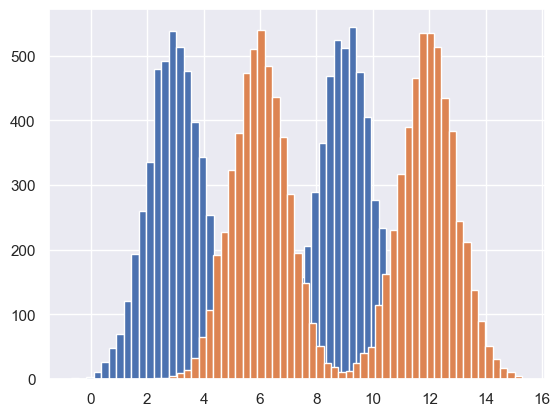

In [14]:
plt.hist(samples2,bins = 50)
plt.hist(samples,bins = 50)

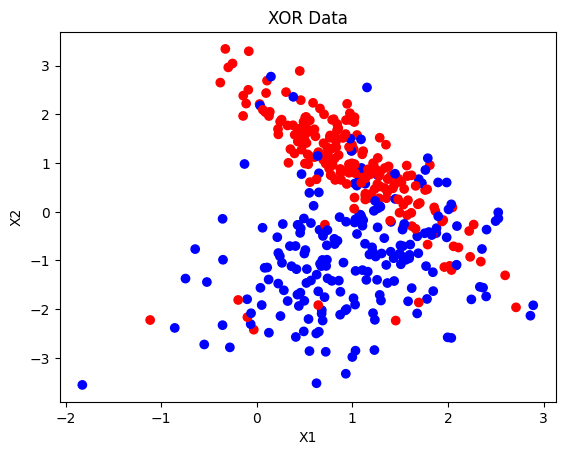

In [16]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Set the random seed for reproducibility


# XOR Data Generation
X, y = make_classification(
    n_samples=400, n_features=2, n_informative=2, n_redundant=0,
    n_clusters_per_class=1, flip_y=0.1, class_sep=1.0, random_state=42
)

# Plotting the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('XOR Data')
plt.show()
